#### importing all necessary libraries



In [14]:
import pandas as pd 

#### converting the csv data to json type for inserting into database


In [31]:
## a simple way to convert a file in different format to standard csv format

import csv
list = []
with open("D:\Projects\Credit_car_fraud_detection\creditcard.csv", 'r') as file:
    data = csv.reader(file,delimiter = '\n')  # extracting one row 
    for i in data:
        list.append(i[0].split(',')) #splitting the data with delimiter ;

In [2]:
with open('D:\Projects\Credit_car_fraud_detection\creditcard_new.csv', 'w',newline='') as data:
    writer = csv.writer(data)
    writer.writerows(list)

In [32]:
import pandas as pd

df = pd.read_csv('D:\Projects\Credit_car_fraud_detection\creditcard.csv')
print(df.head())
print(df.shape)

   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25   
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [33]:
data=df.to_dict(orient="records")
data[:5]

[{'Time': 0.0,
  'V1': -1.3598071336738,
  'V2': -0.0727811733098497,
  'V3': 2.53634673796914,
  'V4': 1.37815522427443,
  'V5': -0.338320769942518,
  'V6': 0.462387777762292,
  'V7': 0.239598554061257,
  'V8': 0.0986979012610507,
  'V9': 0.363786969611213,
  'V10': 0.0907941719789316,
  'V11': -0.551599533260813,
  'V12': -0.617800855762348,
  'V13': -0.991389847235408,
  'V14': -0.311169353699879,
  'V15': 1.46817697209427,
  'V16': -0.470400525259478,
  'V17': 0.207971241929242,
  'V18': 0.0257905801985591,
  'V19': 0.403992960255733,
  'V20': 0.251412098239705,
  'V21': -0.018306777944153,
  'V22': 0.277837575558899,
  'V23': -0.110473910188767,
  'V24': 0.0669280749146731,
  'V25': 0.128539358273528,
  'V26': -0.189114843888824,
  'V27': 0.133558376740387,
  'V28': -0.0210530534538215,
  'Amount': 149.62,
  'Class': 0},
 {'Time': 0.0,
  'V1': 1.19185711131486,
  'V2': 0.26615071205963,
  'V3': 0.16648011335321,
  'V4': 0.448154078460911,
  'V5': 0.0600176492822243,
  'V6': -0.082

In [34]:
import pymongo as mongo
client = mongo.MongoClient(r'mongodb://localhost:27017')
client.database_names()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15600\1830839525.py:3: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  client.database_names()


['admin', 'config', 'fraud_detection', 'local']

In [35]:
def checkExistence_DB(DB_NAME, client):
    """It verifies the existence of DB"""
    DBlist = client.list_database_names()
    if DB_NAME in DBlist:
        print(f"DB: '{DB_NAME}' exists")
        return True
    print(f"DB: '{DB_NAME}' not yet present present in the DB")
    return False


_ = checkExistence_DB(DB_NAME="fraud_detection", client=client)

DB: 'fraud_detection' exists


In [11]:
database_name = 'fraud_detection'

if checkExistence_DB(database_name,client):
    db = client['fraud_detection']  # Create or connect to the 'fraud_detection' database 
    collection = db['transactions']  # Create or connect to the 'transactions' collection
    # Insert the dataset into MongoDB
    collection.insert_many(data)
else:
    db = client['fraud_detection']  # Create or connect to the 'fraud_detection' database 
    collection = db['transactions']  # Create or connect to the 'transactions' collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'fraud_detection'), 'transactions')

In [22]:
# Fetch data from MongoDB
data = collection.find()
df = pd.DataFrame(list(data))

# Drop the MongoDB generated `_id` field if it exists
if '_id' in df.columns:
    df = df.drop('_id', axis=1)
df.head()

##### pre-processing


In [36]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
scalar = StandardScaler()
X = df.drop('Class', axis=1)
y = df.Class

X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### modeling

In [40]:
from sklearn.svm import SVC

In [41]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
print("Train Score:- ",model_svc.score(X_train,y_train))
print("Test Score:- ",model_svc.score(X_test,y_test))


Train Score:-  0.9996752178015756
Test Score:-  0.999385555282469


In [42]:
y_predict = model_svc.predict(X_test)

##### making report


In [43]:
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
import seaborn as sns


In [44]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,55,32
is Normal,3,56872


<Axes: >

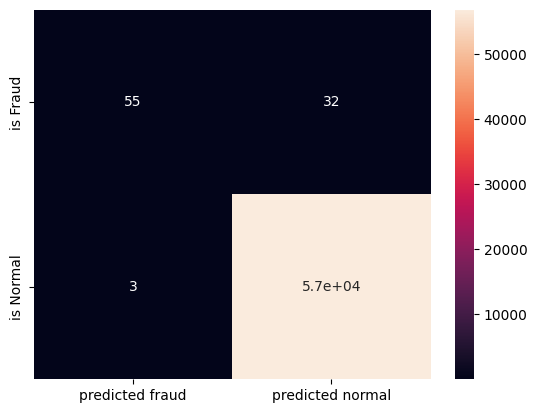

In [45]:
sns.heatmap(confusion, annot=True)

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962

